# Train a deep neural network for an Image classification task using Bean leaf dataset

**Dataset**: <https://www.kaggle.com/datasets/prakharrastogi534/bean-leaf-dataset>

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import cv2
import random as rn
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy.random import seed

In [3]:
import math
import skimage.io
import skimage.transform
import skimage.filters
import keras
from skimage import data, exposure, img_as_float

In [4]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((128, 128))
image_size = 0
directory_root = r"C://Users/admin/Downloads/Bean//train" # Change this to your directory

In [5]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [6]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")


        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")

            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
            print(plant_disease_folder)
            i=len(plant_disease_image_list)
            print (i)
            for image in plant_disease_image_list[:10000]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
                elif image_directory.endswith(".png") == True or image_directory.endswith(".PNG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
              
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing angular_leaf_spot ...
angular_leaf_spot
330
[INFO] Processing bean_rust ...
bean_rust
330
[INFO] Processing healthy ...
healthy
330
[INFO] Image loading completed


In [7]:
image_size = len(image_list)
print(image_size)
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
print(image_labels)
n_classes = len(label_binarizer.classes_)
np_image_list = np.array(image_list, dtype=np.float32) / 225.0
print("[INFO] Spliting data to train, test")
X_train, X_test, y_train, y_test = train_test_split(np_image_list, image_labels,
                                                    test_size=0.2, random_state = 42,shuffle=True)

print(image_labels)

990
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]
[INFO] Spliting data to train, test
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


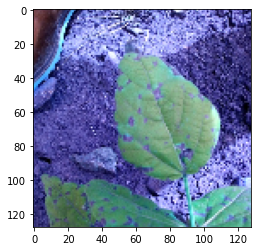

In [8]:
plt.imshow(X_train[1])

In [9]:
# Check the shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((792, 128, 128, 3), (198, 128, 128, 3), (792, 3), (198, 3))

In [10]:
# Check the data type of the dataset
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(dtype('float32'), dtype('float32'), dtype('int32'), dtype('int32'))

In [11]:
type(y_test)

numpy.ndarray

In [12]:
# Build the sequential model

model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128,128,3)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [13]:
# Check model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 128)               6291584   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 3)                 771       
                                                                 
Total params: 6358403 (24.26 MB)
Trainable params: 63584

In [14]:
# Compile the model

model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [15]:
# Fit the model

model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

Epoch 1/50
25/25 [==============================] - 3s 97ms/step - loss: 3.4509 - accuracy: 0.3346 - val_loss: 1.2400 - val_accuracy: 0.3737
Epoch 2/50
25/25 [==============================] - 2s 91ms/step - loss: 1.0257 - accuracy: 0.4811 - val_loss: 0.9169 - val_accuracy: 0.5707
Epoch 3/50
25/25 [==============================] - 2s 89ms/step - loss: 0.9694 - accuracy: 0.5429 - val_loss: 0.9194 - val_accuracy: 0.6212
Epoch 4/50
25/25 [==============================] - 2s 89ms/step - loss: 0.8410 - accuracy: 0.5922 - val_loss: 0.9419 - val_accuracy: 0.5051
Epoch 5/50
25/25 [==============================] - 2s 92ms/step - loss: 0.8111 - accuracy: 0.6376 - val_loss: 0.8621 - val_accuracy: 0.6162
Epoch 6/50
25/25 [==============================] - 2s 90ms/step - loss: 0.8990 - accuracy: 0.6136 - val_loss: 0.8570 - val_accuracy: 0.6010
Epoch 7/50
25/25 [==============================] - 2s 92ms/step - loss: 0.7759 - accuracy: 0.6465 - val_loss: 0.9452 - val_accuracy: 0.5202
Epoch 8/50
25

In [16]:
# Evaluate the model

model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 8ms/step - loss: 1.1229 - accuracy: 0.5253


[1.1228957176208496, 0.5252525210380554]

In [17]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


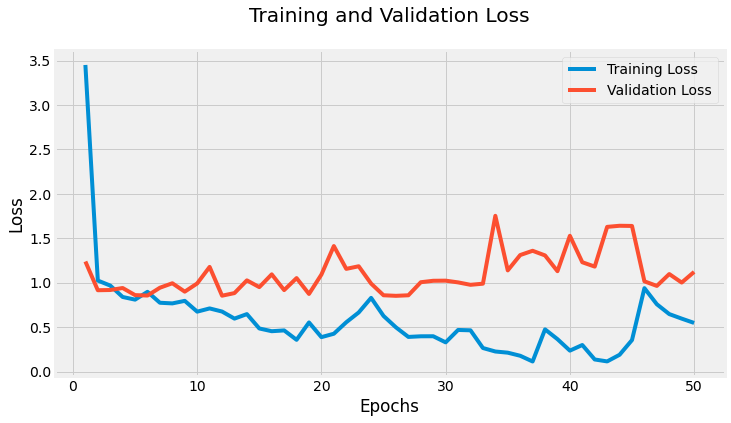

In [18]:
plt.figure(figsize = (12, 6))
plt.style.use('fivethirtyeight')
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 51)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

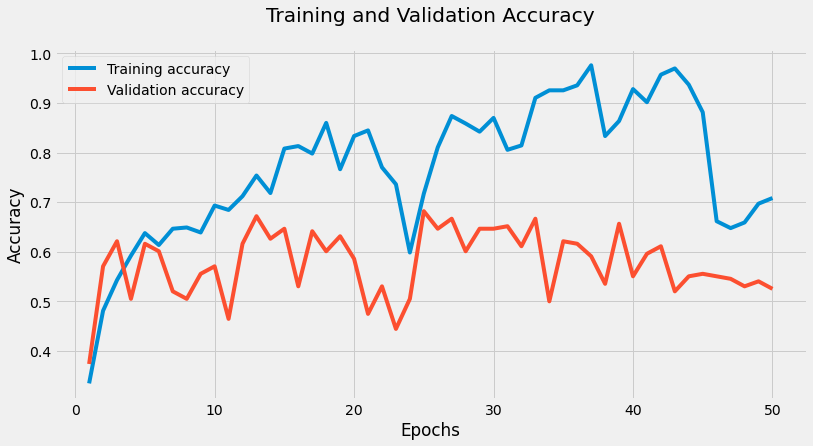

In [19]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
epoch = range(1, 51)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

In [20]:
# Making predictions

y_probs = model.predict(X_test)
y_preds = y_probs.argmax(axis = 1)

y_preds[:100]

7/7 [==============================] - 0s 7ms/step


array([0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1,
       2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0,
       0, 1, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2], dtype=int64)

7/7 [==============================] - 0s 5ms/step


Text(0.5, 88.08737499999995, 'Predicted')

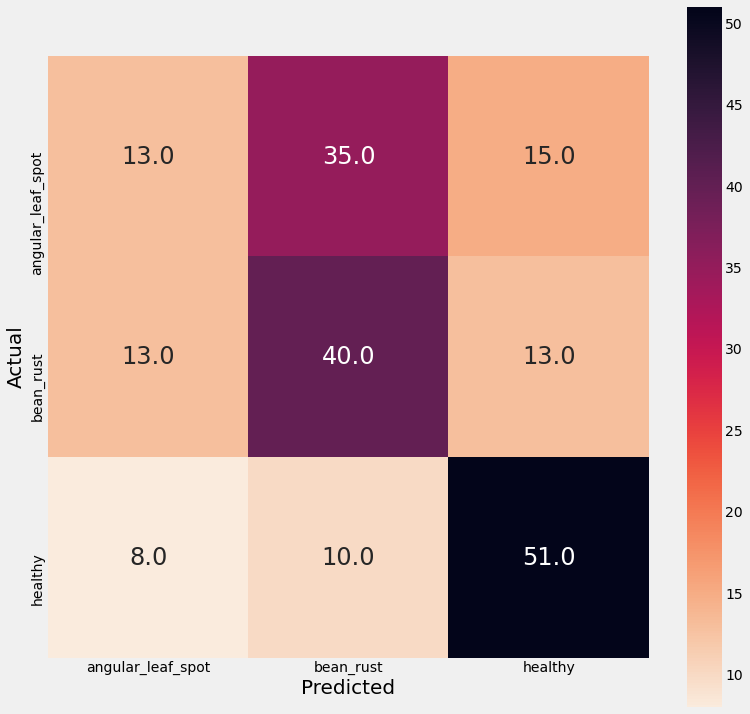

In [21]:
label = ['angular_leaf_spot',        
'bean_rust' ,  
'healthy' ,       
 ]
Ypred = model.predict(X_test)

Ypred = np.argmax(Ypred, axis=1)
Ytrue = np.argmax(y_test, axis=1)

cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':24}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

print('Classification Report:')
print(classification_report(Ytrue, Ypred))

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.21      0.27        63
           1       0.47      0.61      0.53        66
           2       0.65      0.74      0.69        69

    accuracy                           0.53       198
   macro avg       0.50      0.52      0.50       198
weighted avg       0.50      0.53      0.50       198

